# 08.02 - Regression using PyCaret

This notebook is based on the content from Lab 05.03 - Standard Model Workflow and Lab 07.01 - Linear Regressions using Scikit Learn. In those original labs, we utilized PyTorch and Scikit Learn to develop our Linear Regression models. However, in this notebook, we will be employing PyCaret to determine the most effective regression model for our dataset. The goal is to explore how PyCaret can streamline the model-building process and potentially improve our results by automatically identifying the best-performing regression model.

## Load the Data

We first need to load our data. In this case, we're using a dataset called `College.csv`. We can use the `pandas` library to load our dataset as follows:

In [1]:
# Import the pandas library as pd.
import pandas as pd

# Use the read_csv function of pandas to load the dataset.
# The read_csv function takes the file path as an argument.
# Here, './College.csv' is the relative path to the dataset file.
df = pd.read_csv('./College.csv')

# The dataset has an unnamed column that actually represents the university names.
# We rename this column to 'University' using the rename function of pandas DataFrame.
# The rename function takes a dictionary as an argument where the keys are the old column names
# and the values are the new column names.
# The `inplace=True` argument means that the changes are made directly to the original DataFrame.
df.rename(columns={'Unnamed: 0': 'University'}, inplace=True)

# The head function shows the first 5 rows of the DataFrame.
# This is used to quickly test if your dataset has been loaded correctly.
df.head()

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## Data Cleaning: Initial Check

Before we start building our model, it's important to ensure that our data is clean and ready for processing. We should begin by checking for any null values and verifying the data type of our numerical columns.

In [2]:
# Check for null values in the DataFrame
# The isnull() function of pandas DataFrame returns a DataFrame where each cell is either True or False depending on whether that cell's value is null or not, respectively.
# The sum() function is then used to count the number of True values (i.e., nulls) in each column.
# Therefore, df.isnull().sum() returns a pandas Series where the index is the column names and the value is the number of nulls in each column.
df.isnull().sum()

University     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [3]:
# Check the data types of each column in the DataFrame
# The dtypes attribute of pandas DataFrame returns a pandas Series where the index is the column names and the value is the data type of each column.
# This is useful to ensure that all the columns are of the expected data type.
# For example, numerical columns should be either int or float data type, and categorical columns should be object (i.e., string) data type.
df.dtypes

University      object
Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD             object
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

## Data Cleaning: Clean up `PhD` column

The `PhD` column in our dataset is currently being interpreted as a string type because it contains non-numerical values. To ensure we can perform numerical operations on this column, it's crucial to clean it up. We need to replace any non-numerical values with `NaN` (which stands for "Not a Number") and then convert the column data type to float. Here is how we can do this with pandas:

In [4]:
# We are going to clean up the `PhD` column in our DataFrame (df).
# The `PhD` column currently contains some '?' values, which represent missing or unknown data.
# However, the presence of these non-numerical values is causing the entire column to be interpreted as a string data type.
# This is a problem because we want to perform numerical operations on this column.

# Therefore, we need to replace these '?' values with 'np.nan', which stands for 'Not a Number' and is the standard missing data marker used in pandas.
# In addition to replacing '?', we also need to convert the other values in the column to float data type.
# This is because these values are currently strings, and we want them to be floats so that we can perform numerical operations on them.

# To achieve this, we use the 'map' function of pandas Series.
# The 'map' function applies a function to each value in the Series.
# In our case, the function is a lambda function defined as 'lambda phd: np.nan if phd == '?' else float(phd)'.
# This function takes as input a value (phd) and returns np.nan if the value is '?', otherwise it returns the value converted to float.

# Therefore, 'df.PhD.map(lambda phd: np.nan if phd == '?' else float(phd))' gives us a pandas Series where each value is either np.nan (if the original value was '?') or a float (if the original value was not '?').

# We assign this Series back to the 'PhD' column in the DataFrame, thus modifying the original DataFrame.

import numpy as np
df.PhD = df.PhD.map(lambda phd: np.nan if phd == '?' else float(phd))  # Expected return type: None

In [5]:
# Now that we have cleaned up our data, it's important to check the data types of each column once again.
# We'll use the dtypes attribute of the pandas DataFrame, which returns a pandas Series.
# In this Series, the index is the column names and the value is the data type of each column.

# This is crucial to ensure that all the columns are of the expected data type after our data cleaning.
# For example, we expect the 'PhD' column to be of float data type after replacing '?' values with 'np.nan' and converting the other values to float.

# We simply need to call the dtypes attribute on our DataFrame as follows:

df.dtypes

# The output will be a pandas Series where each index-value pair represents a column name and its data type, respectively.
# We should check that the 'PhD' column is of float data type.

University      object
Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD            float64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [6]:
# Now, we want to check if there are any null values in our DataFrame.
# Null values are missing values that are often represented as 'NaN' (Not a Number) in pandas.
# These null values can cause issues when we try to build our model, as the model cannot handle null values.

# To check for null values, we use the isnull() function of pandas DataFrame.
# The isnull() function returns a DataFrame where each cell is either True or False depending on whether that cell's value is null or not, respectively.

# However, it can be difficult to manually check each cell in the returned DataFrame, especially when the DataFrame is large.
# Therefore, we use the sum() function to count the number of True values (i.e., nulls) in each column.
# The sum() function works because pandas treats True as 1 and False as 0.

# Therefore, df.isnull().sum() returns a pandas Series where the index is the column names and the value is the number of nulls in each column.
# We can then easily see which columns contain null values and how many nulls there are in each column.

# The following line of code performs this operation and displays the result.
df.isnull().sum()

University      0
Private         0
Apps            0
Accept          0
Enroll          0
Top10perc       0
Top25perc       0
F.Undergrad     0
P.Undergrad     0
Outstate        0
Room.Board      0
Books           0
Personal        0
PhD            29
Terminal        0
S.F.Ratio       0
perc.alumni     0
Expend          0
Grad.Rate       0
dtype: int64

## Data Cleaning: Drop `NaN`'s

Now that we've identified the presence of `NaN` values in our data, we need to handle these missing values before we can proceed with building our model. For the purposes of this exercise, since the nulls represent a small percentage of our data, we will simply drop these rows.

In [7]:
# Now, we can check the shape of our DataFrame.
# The shape attribute of the pandas DataFrame returns a tuple representing the dimensions of the DataFrame.
# The first element of the tuple is the number of rows, and the second element is the number of columns.
# This is useful to understand the size of our DataFrame, i.e., how many data points (rows) and features (columns) we have.
# It can also be used as a sanity check to ensure that our data cleaning did not unintentionally remove or add any rows or columns.
# We simply need to call the shape attribute on our DataFrame as follows:

df.shape

# The output will be a tuple where the first element is the number of rows and the second element is the number of columns.
# We can interpret this as "We have 'x' data points with 'y' features each", where 'x' is the first element of the tuple, and 'y' is the second element of the tuple.

(777, 19)

In [8]:
# Now that we've identified the presence of NaN values in our dataframe, it's important to handle these missing values.
# NaN values, which stand for 'Not a Number', represent missing or null data in the dataframe.
# Our model won't be able to handle these NaN values, so we need to deal with them before we can build our model.

# There are many strategies to handle missing data, and the best strategy depends on the nature of our data and the specific situation.
# In our case, we've decided to simply remove the rows with missing data.
# This is a reasonable strategy because the missing data represents a small portion of our dataset.

# We can use the 'dropna' function of pandas dataframe to remove these rows.
# The 'dropna' function removes rows with NaN values and returns a new dataframe.
# By passing the argument 'inplace=True', we modify the original dataframe directly, without creating a new dataframe.

df.dropna(inplace=True)  # Expected return type: None

# After handling the missing data, it's important to check the shape of our dataframe.
# The 'shape' attribute of pandas dataframe provides the dimensions of the dataframe, i.e., the number of rows (data points) and columns (features).
# This can help us understand the size of our dataframe and ensure that our data cleaning operations (such as dropping rows) have been carried out correctly.

# We can access the 'shape' attribute as follows:

df.shape  # Expected return type: tuple

# The output will be a tuple where the first element is the number of rows and the second element is the number of columns.
# We can interpret this as "We have 'x' data points with 'y' features each", where 'x' is the first element of the tuple and 'y' is the second element of the tuple.

(748, 19)

## Feature Engineering: Binarize `'Private'` column

In our dataset, the `Private` column contains categorical data, i.e., 'Yes' and 'No' values indicating whether a university is private or not. However, our model will need numerical data to work with. Therefore, we need to convert these categorical values into numerical values, a process known as binarization.

In [9]:
# Now, we want to check the distribution of values in the 'Private' column.
# The 'Private' column in our DataFrame (df) is a binary categorical column that represents whether a university is private or not.
# It contains 'Yes' and 'No' values, where 'Yes' means the university is private, and 'No' means the university is not private.

# However, before we binarize this column (i.e., replace 'Yes' with 1 and 'No' with 0), it's useful to check how many 'Yes' and 'No' values there are.
# This can help us understand the distribution of private and non-private universities in our dataset.

# The 'value_counts' function of pandas Series is used for this purpose.
# The function returns a pandas Series where the index is the unique values in the original Series, and the value is the count of each unique value.
# Therefore, df['Private'].value_counts() returns a pandas Series where the index is ['Yes', 'No'], and the value is the count of 'Yes' and 'No' in the 'Private' column.

df['Private'].value_counts()  # Expected return type: pandas.Series

# The output will be a pandas Series where each index-value pair represents a unique value in the 'Private' column and its count, respectively.
# We can interpret this as "There are 'x' private universities and 'y' non-private universities", where 'x' is the count of 'Yes', and 'y' is the count of 'No'.

Yes    544
No     204
Name: Private, dtype: int64

In [10]:
# Now that we have checked the distribution of 'Yes' and 'No' in the 'Private' column, we can proceed to binarize this column.
# Binarization is the process of converting a categorical column into a numerical column.
# In this case, we replace 'Yes' with 1 and 'No' with 0 in the 'Private' column.
# This way, our model can handle the 'Private' column because the model needs numerical data.

# We use the 'map' function of pandas Series to apply a function to each value in the 'Private' column.
# This function is a dictionary where the keys are the old values ('Yes' and 'No') and the values are the new values (1 and 0).

# The 'map' function returns a new pandas Series where each value is either 1 or 0 depending on whether the original value was 'Yes' or 'No', respectively.
# We assign this new Series to the 'Private' column in the DataFrame, thus modifying the original DataFrame.

# The following line of code performs this operation:

df['Private'] = df['Private'].map({'Yes': 1, 'No': 0})  # Expected return type: None

# After binarizing the 'Private' column, it's crucial to check the distribution of 1 and 0 in the 'Private' column.
# This is to ensure that the binarization was performed correctly.
# We can use the 'value_counts' function again for this purpose.

# df['Private'].value_counts()  # Expected return type: pandas.Series

# The output will be a pandas Series where each index-value pair represents a unique value in the 'Private' column and its count, respectively.
# We can interpret this as "There are 'x' private universities and 'y' non-private universities", where 'x' is the count of 1, and 'y' is the count of 0.

## Feature Engineering: Create an `Elite` column

The `Top10perc` column in our dataset represents the percentage of enrolled students who graduated high school in the top 10th percentile. To further enhance our understanding of the data, we can create a new column named `Elite`. This column will indicate whether a significant portion (50% or more) of the students enrolled at the university were in the top 10th percentile of their high school graduating class.

To create this new `Elite` column, we can apply a function to the `Top10perc` column that assigns a 1 if the `Top10perc` value is greater than or equal to 50, and a 0 otherwise. Here's how we can do this using pandas:

In [11]:
# Now, we want to create a new column in our DataFrame, called 'Elite'.
# This column will be a binary column (containing only 0s and 1s), representing whether a significant portion (50% or more) of the students enrolled at the university were in the top 10th percentile of their high school graduating class.

# To create the 'Elite' column, we apply a condition to the 'Top10perc' column.
# The condition is 'df.Top10perc > 50', which checks whether the 'Top10perc' value is greater than 50 for each row in the DataFrame.
# The result is a pandas Series where each value is either True (if the condition is met) or False (if the condition is not met).

# However, we want our 'Elite' column to be a binary column of 0s and 1s, not Trues and Falses.
# Therefore, we convert the True/False values to 1/0 values using the 'astype' function of pandas Series.
# The 'astype' function takes as input a data type (in this case, 'int') and converts the Series values to this data type.
# Therefore, '(df.Top10perc > 50).astype(int)' is a pandas Series where each value is either 1 (if 'Top10perc' is greater than 50) or 0 (if 'Top10perc' is not greater than 50).

# Finally, we assign this Series to a new column 'Elite' in the DataFrame, thus creating the 'Elite' column.

# The following line of code performs this operation:

df['Elite'] = (df.Top10perc > 50).astype(int)  # Expected return type: None

# After creating the 'Elite' column, it's crucial to check the distribution of 1 and 0 in this column.
# This is to ensure that the 'Elite' column was created correctly.
# We can use the 'value_counts' function for this purpose.

# df['Elite'].value_counts()  # Expected return type: pandas.Series

# The output will be a pandas Series where each index-value pair represents a unique value in the 'Elite' column and its count, respectively.
# We can interpret this as "There are 'x' elite universities and 'y' non-elite universities", where 'x' is the count of 1, and 'y' is the count of 0.

## Train Regression Models using PyCaret

In [12]:
# First, we need to import the RegressionExperiment class from the pycaret.regression module.
# PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows.
# The RegressionExperiment class is used to create and manage regression experiments in PyCaret.

from pycaret.regression import RegressionExperiment

# Next, we create an instance of the RegressionExperiment class.
# This instance will be used to manage our regression experiment, including data preprocessing, model training, and evaluation.
# We can name our instance 'regression_experiment'.

regression_experiment: RegressionExperiment = RegressionExperiment()

# Now, we set up our regression experiment using the setup method of the RegressionExperiment instance.
# The setup method initializes the experiment and performs various preprocessing steps on the data.
# It takes several parameters, including the data, the target variable, and a random seed for reproducibility.

# The 'df' parameter is our dataset, which is a pandas DataFrame.
# The 'target' parameter is the name of the target variable, i.e., the variable we want to predict.
# In our case, the target variable is 'Apps', which represents the number of applications received by each university.
# The 'session_id' parameter is a random seed used for reproducibility.
# By setting 'session_id' to a specific value (e.g., 123), we ensure that we get the same results every time we run the setup.

regression_experiment.setup(data=df, target='Apps', session_id=123)

,Description,Value
0,Session id,123
1,Target,Apps
2,Target type,Regression
3,Original data shape,"(748, 20)"
4,Transformed data shape,"(748, 20)"
5,Transformed train set shape,"(523, 20)"
6,Transformed test set shape,"(225, 20)"
7,Numeric features,18
8,Categorical features,1
9,Preprocess,True


In [13]:
# Now that we have set up our regression experiment using PyCaret, we want to find the best regression model for our dataset.
# PyCaret provides a convenient method called 'compare_models' that automatically trains and evaluates multiple regression models using cross-validation.
# The method returns the best-performing model based on a specified performance metric (e.g., R-squared, Mean Absolute Error).

# Let's break down the following:

# 'best_regression' is a variable that will hold the best-performing regression model.
# The type of 'best_regression' will be a PyCaret model object, which could be any one of the regression models supported by PyCaret (e.g., Linear Regression, Random Forest, Gradient Boosting).

# 'regression_experiment' is an instance of the RegressionExperiment class that we created earlier.
# This instance manages our regression experiment, including data preprocessing, model training, and evaluation.

# 'compare_models' is a method of the RegressionExperiment class.
# This method trains and evaluates multiple regression models using cross-validation.
# It takes several optional parameters, such as 'n_select' (the number of top models to return), 'include' (a list of models to include), and 'exclude' (a list of models to exclude).
# By default, 'compare_models' evaluates all available regression models and returns the best-performing model based on the default performance metric (R-squared).

# The following line of code trains and evaluates multiple regression models using cross-validation,
# and assigns the best-performing model to the 'best_regression' variable:

best_regression = regression_experiment.compare_models()

# The type annotation 'Any' indicates that 'best_regression' can be any type of model object.
# In practice, it will be a specific model object, such as a Linear Regression model, a Random Forest model, or a Gradient Boosting model.

# After executing this line of code, 'best_regression' will contain the best-performing regression model,
# which we can further analyze, fine-tune, and use for making predictions on new data.

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,519.3164,1597989.5089,1178.7386,0.8868,0.2518,0.1620,0.0140
par,Passive Aggressive Regressor,640.8572,1899952.8237,1296.0663,0.8656,0.4876,0.3059,0.0090
knn,K Neighbors Regressor,798.9928,3653854.3605,1623.8560,0.8085,0.4344,0.4051,0.0150
omp,Orthogonal Matching Pursuit,1205.6591,5879580.3876,2155.0317,0.6681,0.6157,0.6944,0.0130
et,Extra Trees Regressor,2043.4272,10554051.4567,3009.2573,0.3604,1.0421,1.7789,0.0340
lar,Least Angle Regression,2164.9147,13015496.8911,3347.2180,0.1679,1.1088,1.8618,0.0110
lightgbm,Light Gradient Boosting Machine,2352.8969,13152443.1183,3416.0617,0.1616,1.1733,2.2067,0.1260
xgboost,Extreme Gradient Boosting,2494.2180,15424381.3294,3735.9598,-0.0106,1.2060,2.2450,0.3350
gbr,Gradient Boosting Regressor,2494.4600,15449924.9743,3740.0576,-0.0135,1.2057,2.2403,0.0330
dt,Decision Tree Regressor,2505.4262,15509175.6496,3748.6118,-0.0190,1.2099,2.2554,0.0110


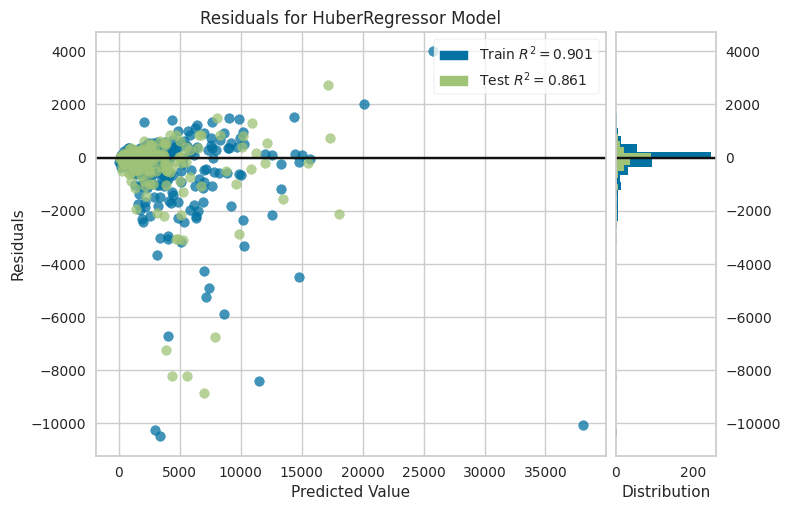

In [14]:
# Now that we have identified the best-performing regression model using PyCaret's `compare_models` method,
# we want to visualize the residuals of this model.
# Residuals are the differences between the observed values (actual values) and the predicted values.
# Plotting the residuals helps us understand how well our model is performing and whether there are any patterns in the errors.

# PyCaret provides a convenient method called `plot_model` that allows us to create various diagnostic plots for our model.
# The `plot_model` method can generate several types of plots, such as residual plots, prediction error plots, and feature importance plots.

# Let's break down the following:

# `regression_experiment` is an instance of the RegressionExperiment class that we created earlier.
# This instance manages our regression experiment, including data preprocessing, model training, evaluation, and visualization.

# `plot_model` is a method of the RegressionExperiment class.
# This method generates diagnostic plots for a given model.
# It takes several parameters, including the model to plot (`best_regression`), the type of plot (`plot`), and additional plot-specific parameters.

# `best_regression` is the best-performing regression model identified by the `compare_models` method.
# This model object could be any one of the regression models supported by PyCaret (e.g., Linear Regression, Random Forest, Gradient Boosting).

# `plot='residuals'` specifies that we want to generate a residual plot.
# A residual plot displays the residuals (errors) on the y-axis and the predicted values on the x-axis.
# This plot helps us identify any patterns or trends in the residuals, which can indicate potential issues with the model.

# The following line of code generates a residual plot for the `best_regression` model using the `plot_model` method:

regression_experiment.plot_model(best_regression, plot='residuals')

# The type annotation `None` indicates that the `plot_model` method does not return any value.
# Instead, it directly generates and displays the specified plot.

# After executing this line of code, a residual plot will be displayed,
# allowing us to visually inspect the residuals and assess the performance of our best-performing regression model.

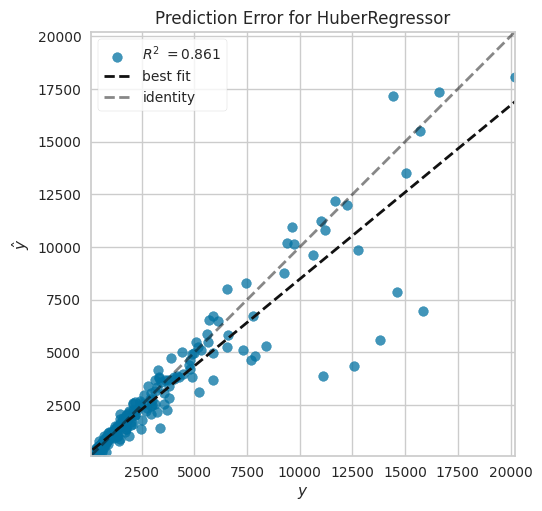

In [15]:
# Now that we have identified the best-performing regression model using PyCaret's `compare_models` method,
# we want to visualize the prediction error for this model.
# Prediction error is the difference between the actual values and the predicted values.
# Plotting the prediction error helps us understand how well our model is performing and whether the errors are randomly distributed.

# PyCaret provides a convenient method called `plot_model` that allows us to create various diagnostic plots for our model.
# The `plot_model` method can generate several types of plots, such as residual plots, prediction error plots, and feature importance plots.

# Let's break down the following:

# `regression_experiment` is an instance of the RegressionExperiment class that we created earlier.
# This instance manages our regression experiment, including data preprocessing, model training, evaluation, and visualization.

# `plot_model` is a method of the RegressionExperiment class.
# This method generates diagnostic plots for a given model.
# It takes several parameters, including the model to plot (`best_regression`), the type of plot (`plot`), and additional plot-specific parameters.

# `best_regression` is the best-performing regression model identified by the `compare_models` method.
# This model object could be any one of the regression models supported by PyCaret (e.g., Linear Regression, Random Forest, Gradient Boosting).

# `plot='error'` specifies that we want to generate a prediction error plot.
# A prediction error plot displays the actual values on the x-axis and the predicted values on the y-axis.
# This plot helps us identify any patterns or trends in the prediction errors, which can indicate potential issues with the model.

# The following line of code generates a prediction error plot for the `best_regression` model using the `plot_model` method:

regression_experiment.plot_model(best_regression, plot='error')

# The type annotation `None` indicates that the `plot_model` method does not return any value.
# Instead, it directly generates and displays the specified plot.

# After executing this line of code, a prediction error plot will be displayed,
# allowing us to visually inspect the prediction errors and assess the performance of our best-performing regression model.

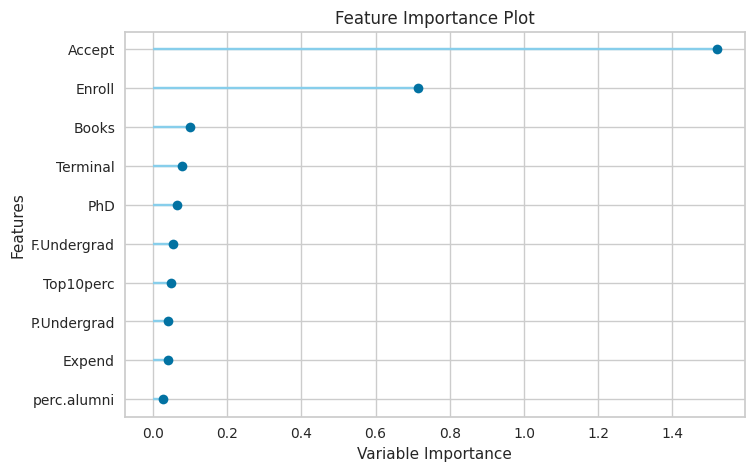

In [16]:
# Now that we have identified the best-performing regression model using PyCaret's `compare_models` method,
# we want to visualize the feature importance for this model.
# Feature importance is a technique that assigns a score to input features based on how useful they are at predicting a target variable.
# This helps us understand which features are most influential in our model's predictions.

# PyCaret provides a convenient method called `plot_model` that allows us to create various diagnostic plots for our model.
# The `plot_model` method can generate several types of plots, such as residual plots, prediction error plots, and feature importance plots.

# Let's break down the following:

# `regression_experiment` is an instance of the RegressionExperiment class that we created earlier.
# This instance manages our regression experiment, including data preprocessing, model training, evaluation, and visualization.

# `plot_model` is a method of the RegressionExperiment class.
# This method generates diagnostic plots for a given model.
# It takes several parameters, including the model to plot (`best_regression`), the type of plot (`plot`), and additional plot-specific parameters.

# `best_regression` is the best-performing regression model identified by the `compare_models` method.
# This model object could be any one of the regression models supported by PyCaret (e.g., Linear Regression, Random Forest, Gradient Boosting).

# `plot='feature'` specifies that we want to generate a feature importance plot.
# A feature importance plot displays the importance scores of the input features, helping us understand which features are most influential in our model's predictions.

# The following line of code generates a feature importance plot for the `best_regression` model using the `plot_model` method:

regression_experiment.plot_model(best_regression, plot='feature')

# The type annotation `None` indicates that the `plot_model` method does not return any value.
# Instead, it directly generates and displays the specified plot.

# After executing this line of code, a feature importance plot will be displayed,
# allowing us to visually inspect the importance scores of the input features and assess which features are most influential in our best-performing regression model.

In [17]:
# Now that we have trained and evaluated our regression model using PyCaret's `compare_models` method,
# we want to use the best-performing model to make predictions on new data or on the same data used for training (for evaluation purposes).

# PyCaret provides a convenient method called `predict_model` that allows us to make predictions using a trained model.
# The `predict_model` method can be used to generate predictions, calculate performance metrics, and create additional diagnostic plots.

# Let's break down the following:

# `regression_experiment` is an instance of the RegressionExperiment class that we created earlier.
# This instance manages our regression experiment, including data preprocessing, model training, evaluation, and prediction.

# `predict_model` is a method of the RegressionExperiment class.
# This method generates predictions using a given model and returns a DataFrame with the original data, predicted values, and prediction errors.
# It takes several parameters, including the model to use for prediction (`best_regression`) and the data to make predictions on (default is the original data used for training).

# `best_regression` is the best-performing regression model identified by the `compare_models` method.
# This model object could be any one of the regression models supported by PyCaret (e.g., Linear Regression, Random Forest, Gradient Boosting).

# `pred_regression` is a variable that will hold the DataFrame returned by the `predict_model` method.
# The DataFrame will contain the original data, predicted values, and prediction errors.
# The type of `pred_regression` will be a pandas DataFrame.

# The following line of code generates predictions using the `best_regression` model and assigns the resulting DataFrame to `pred_regression`:

pred_regression: pd.DataFrame = regression_experiment.predict_model(best_regression)

# After executing this line of code, `pred_regression` will contain a DataFrame with the original data, predicted values, and prediction errors.
# We can further analyze this DataFrame to evaluate the performance of our best-performing regression model and understand how well it makes predictions.

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,546.9979,1843587.0096,1357.7875,0.8612,0.2595,0.1607
